# Decline in Product Revenue as an Indicator of Churn

## Importing the libraries 

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Importing the dataset

In [9]:
df_product = pd.read_csv("../staging/data_set/cleaned_product.csv")
df_expansion = pd.read_csv("../staging/data_set/cleaned_expansion.csv")

## Convert dates

In [10]:
for df in [df_product, df_expansion]:
    df["score_date"] = pd.to_datetime(df["score_date"], errors="coerce")
    df["year_month"] = df["score_date"].dt.to_period("M").astype(str)

## Compute Product Churn

In [11]:
df_product.sort_values(["id", "year_month"], inplace=True)

def compute_churn(df, col):
    prev = df.groupby("id")[col].shift(1)
    churn = ((prev == 1) & (df[col] == 0)).astype(int)
    return churn

df_product["team_churn"] = compute_churn(df_product, "team_plus")
df_product["pro_churn"] = compute_churn(df_product, "pro_plus")
df_product["ent_churn"] = compute_churn(df_product, "ent_plus")

df_product["churn_total"] = (
    (df_product["team_churn"] + df_product["pro_churn"] + df_product["ent_churn"]) > 0
).astype(int)

## Merge the Dataset

In [12]:
df_merged = pd.merge(
    df_product[["id", "year_month", "churn_total"]],
    df_expansion[["id", "year_month", "arr_change"]],
    on=["id", "year_month"],
    how="inner",
)

## Visualization

C:\Users\puvvu\AppData\Local\Temp\ipykernel_28104\2101028449.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_merged, x="churn_total", y="arr_change", palette="Set2")  # 0 or 1


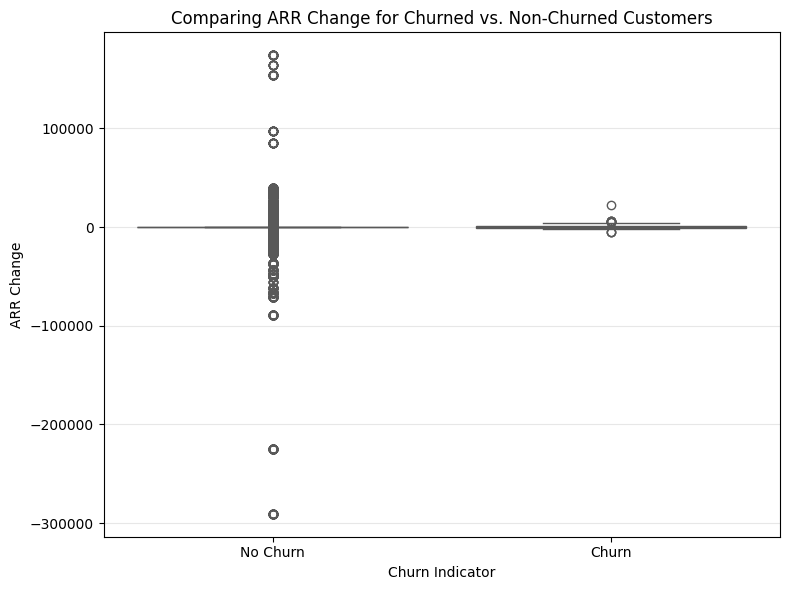

In [13]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_merged, x="churn_total", y="arr_change", palette="Set2")  # 0 or 1
plt.xticks([0, 1], ["No Churn", "Churn"])  # Rename x-axis categories
plt.xlabel("Churn Indicator")
plt.ylabel("ARR Change")
plt.title("Comparing ARR Change for Churned vs. Non-Churned Customers")
plt.grid(True, axis="y", alpha=0.3)
plt.tight_layout()
plt.show()

## Scatter Plot of Current vs Future ARR

In [14]:
plt.figure(figsize=(10, 6))
colors = df['churn_flag'].map({0: 'green', 1: 'red'})
plt.scatter(df['current_arr'], df['future_arr'], c=colors, s=100, alpha=0.7)
plt.xlabel('Current ARR')
plt.ylabel('Future ARR')
plt.title('Current vs. Future ARR by Churn Status')
import numpy as np
x_vals = np.linspace(df['current_arr'].min(), df['current_arr'].max(), 100)
plt.plot(x_vals, 0.8 * x_vals, linestyle='--', color='gray', label='80% Threshold')
plt.legend()
plt.show()


KeyError: 'churn_flag'

<Figure size 1000x600 with 0 Axes>